# Rock Fries Your Brains

First we load the needed packages for this exercise:

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# The data

The data for this experiment came from a student named David Merrell, who collected them as part of a high school science project. Merrell raised three groups of mice.

- Group 1 was raised in the absence of music
- Group 2 heard 10-12 hours of Mozart every day
- Group 3 heard 10-12 hours of rock music (performed by the group Anthrax) every day

They were originally taught to navigate a maze for food, and then were placed back in the maze each week and the time to run the maze was collected. (Actually there were three trials each week, and the data file gives those three times). Included are also the mean and the median running time per week. Finally, the weights of each mouse when they were received from the breeding lab and at each of the four weeks of testing (wt0 to wt4) are included.

In the data, missing values are coded as 999 (but this is handled by the command below).

## Load data

Load data from URL:

In [14]:
musik = pd.read_csv("https://asta.math.aau.dk/datasets?file=musik.txt", sep="\t").replace(999, np.nan)
musik.head()

subject  group  wk1r1  wk1r2  wk1r3  wk2r1  wk2r2  wk2r3  wk3r1  wk3r2  \
0        1      1   1068    534    352    982    170    492  492.0  926.0   
1        2      1   1017    568    529    715    608     89  383.0   57.0   
2        3      1   1156    720     60    620    572    239  795.0   83.0   
3        4      1    805    205    497    209    396    600  106.0  419.0   
4        5      1    456    245   1160    401    533    828  589.0  422.0   

   ...       week4   wt0   wt1   wt2   wt3   wt4  median1  median2  median3  \
0  ...  444.666667  16.1  16.8  24.1  27.4  29.3      534      492    492.0   
1  ...  219.666667  18.5  14.5  24.7  29.5  30.3      568      608    166.0   
2  ...  347.333333  17.6  16.0  25.0   3.1  29.3      720      572    136.0   
3  ...  327.333333  17.7  17.3  24.7  27.0  26.8      497      396    419.0   
4  ...  431.000000  17.0  16.5  24.5  27.2  27.8      456      533    422.0   

   median4  
0    592.0  
1    251.0  
2    230.0  
3    369.0  
4    442.0  

[5 rows x 27 columns]

## Convert group variable to a categorical variable

We now convert the group variable to a categorical variable with proper names (instead of 1, 2, 3):

In [15]:
musik["group"] = pd.Categorical(musik["group"].map({1: "Control", 2: "Mozart", 3: "Rock"}))
musik.head()

subject    group  wk1r1  wk1r2  wk1r3  wk2r1  wk2r2  wk2r3  wk3r1  wk3r2  \
0        1  Control   1068    534    352    982    170    492  492.0  926.0   
1        2  Control   1017    568    529    715    608     89  383.0   57.0   
2        3  Control   1156    720     60    620    572    239  795.0   83.0   
3        4  Control    805    205    497    209    396    600  106.0  419.0   
4        5  Control    456    245   1160    401    533    828  589.0  422.0   

   ...       week4   wt0   wt1   wt2   wt3   wt4  median1  median2  median3  \
0  ...  444.666667  16.1  16.8  24.1  27.4  29.3      534      492    492.0   
1  ...  219.666667  18.5  14.5  24.7  29.5  30.3      568      608    166.0   
2  ...  347.333333  17.6  16.0  25.0   3.1  29.3      720      572    136.0   
3  ...  327.333333  17.7  17.3  24.7  27.0  26.8      497      396    419.0   
4  ...  431.000000  17.0  16.5  24.5  27.2  27.8      456      533    422.0   

   median4  
0    592.0  
1    251.0  
2    230.0  
3    369.0  
4    442.0  

[5 rows x 27 columns]

# Exploratory analysis

## Numerical summaries

Let us see a summary of the `week1` means for each group:

In [21]:
musik.groupby("group")["week1"].describe()

/tmp/ipykernel_4830/850470079.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  musik.groupby("group")["week1"].describe()


count        mean         std         min         25%         50%  \
group                                                                        
Control   24.0  597.222222   77.315569  383.000000  560.750000  622.166667   
Mozart    24.0  618.013889   96.187140  470.666667  555.833333  612.833333   
Rock      24.0  569.638889  110.058567  289.333333  521.083333  576.666667   

                75%         max  
group                            
Control  650.833333  704.666667  
Mozart   662.583333  930.333333  
Rock     619.333333  838.666667

And the corresponding summary for `week4` means for each group:

In [17]:
# Delete this line and add the correct code yourself

## Boxplots

Let us try to illustrate all four weeks' means using boxplots:

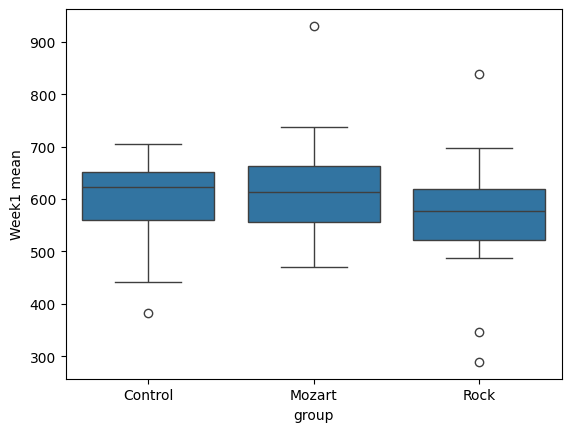

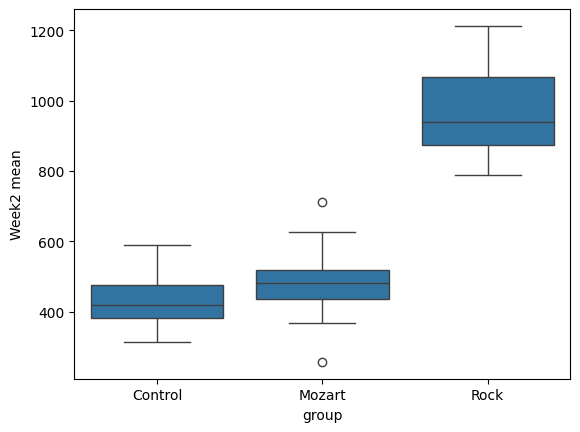

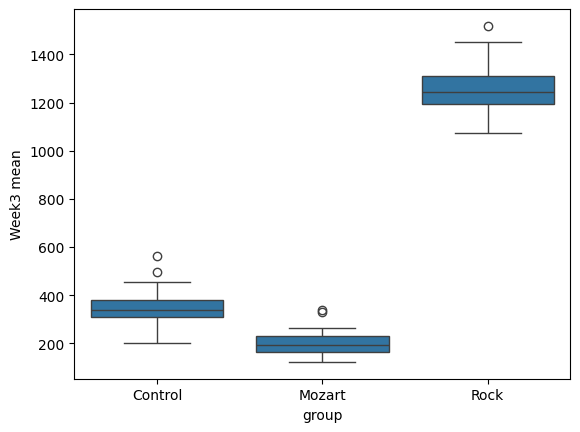

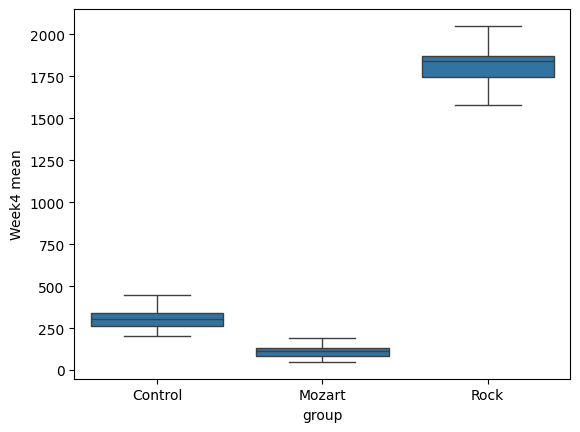

In [18]:

sns.boxplot(x="group", y="week1", data=musik)
plt.ylabel("Week1 mean")
plt.show()
sns.boxplot(x="group", y="week2", data=musik)
plt.ylabel("Week2 mean")
plt.show()
sns.boxplot(x="group", y="week3", data=musik)
plt.ylabel("Week3 mean")
plt.show()
sns.boxplot(x="group", y="week4", data=musik)
plt.ylabel("Week4 mean")
plt.show()

If we want to arrange these in a joint plot we can use plt.subplots:

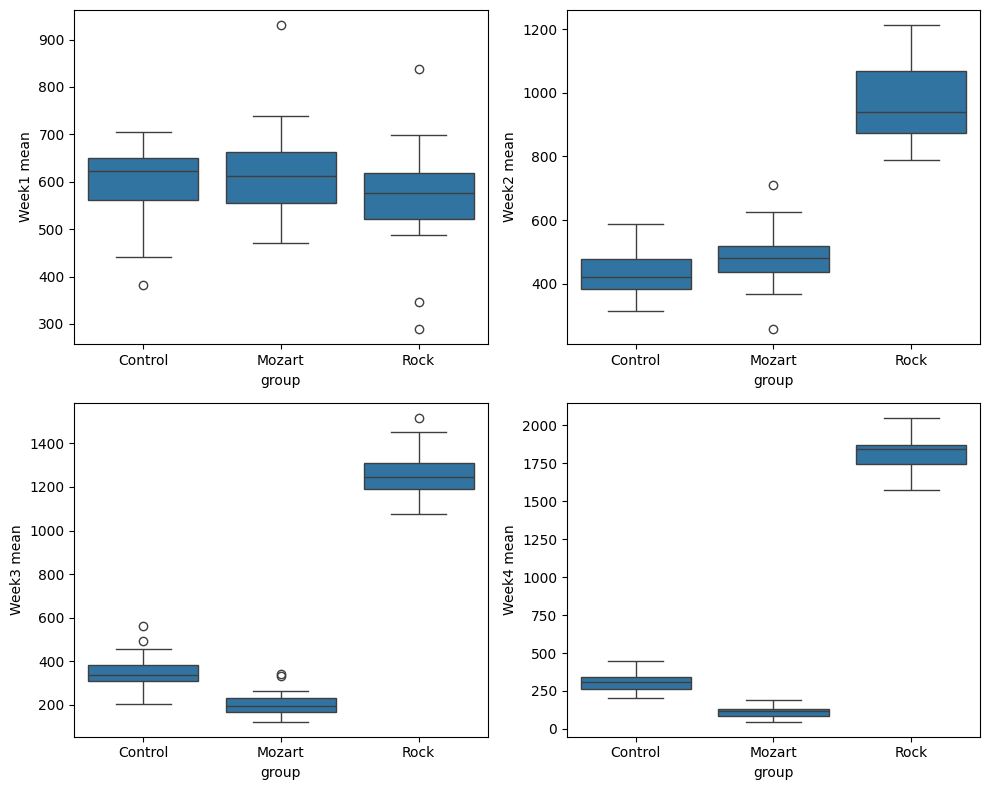

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
sns.boxplot(x="group", y="week1", data=musik, ax=axes[0, 0])
axes[0, 0].set_ylabel("Week1 mean")
sns.boxplot(x="group", y="week2", data=musik, ax=axes[0, 1])
axes[0, 1].set_ylabel("Week2 mean")
sns.boxplot(x="group", y="week3", data=musik, ax=axes[1, 0])
axes[1, 0].set_ylabel("Week3 mean")
sns.boxplot(x="group", y="week4", data=musik, ax=axes[1, 1])
axes[1, 1].set_ylabel("Week4 mean")
plt.tight_layout()
plt.show()

## Scatter plots

We can also compare the `week1` performance with `week4` performance for each subject by using one or more scatter plots using `gf_point` function. A basic scatter plot doesn't tells us much (other than some mice have become much slower in week 4):

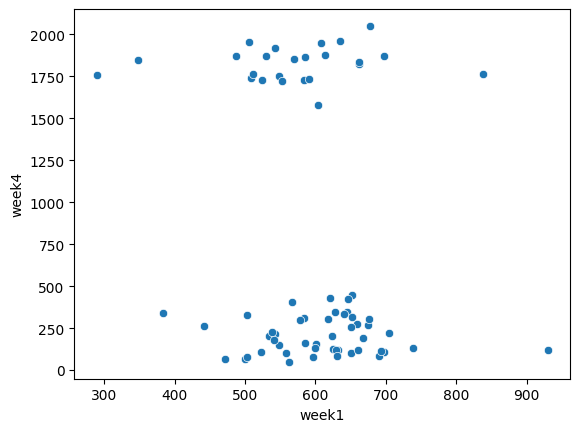

In [20]:
sns.scatterplot(x="week1", y="week4", data=musik)
plt.show()

Try to add a code chunk similar to the one above where you color the points depending on which group they belong to (hint: hue=... can be used for this). Can you predict what this plot will look like?

Does it seem like there is any difference between the groups?

As a further source of inspiration you can have a look at the [data source](https://www.uvm.edu/~statdhtx/StatPages/More_Stuff/Anthrax.html), where you also can find some suggestions to the data analysis.